In [1]:
!pip install livelossplot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
from tensorflow.keras.models import model_from_json
print("Tensorflow version:", tf.__version__)

###########################################################



Tensorflow version: 2.6.4


In [2]:

import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import model_from_json
from tensorflow.python.keras.backend import set_session
import os

In [3]:
#utils.datasets.fer.plot_example_images(plt).show()

38 button images
128 title images
95 input images
97 paragraph images
134 image images


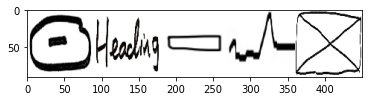

In [4]:
mat=[]
for expression in os.listdir("/kaggle/input/dataset3/dataset/train/"):
    print(str(len(os.listdir("/kaggle/input/dataset3/dataset/train/" + expression))) + " " + expression + " images")
    image=cv2.imread("/kaggle/input/dataset3/dataset/train/"+ expression+"/"+os.listdir("/kaggle/input/dataset3/dataset/train/" + expression)[0])
    image=cv2.resize(image,(90,90))
    mat.append(image)
plt.imshow(cv2.hconcat(mat))

In [5]:
img_size = 75
batch_size = 16

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("/kaggle/input/dataset3/dataset/train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("/kaggle/input/dataset3/dataset/test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True
                                                             )

Found 492 images belonging to 5 classes.
Found 197 images belonging to 5 classes.


In [6]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(img_size**2,(3,3), padding='same', input_shape=(img_size, img_size,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(32,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

"""
# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(1024,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
"""
# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

"""# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))"""

model.add(Dense(5, activation='softmax'))

opt = Adam(learning_rate=0.00005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.PrecisionAtRecall(0.7)])
model.summary()

2022-10-31 15:41:26.177460: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 15:41:26.266444: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 15:41:26.267263: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 5625)      56250     
_________________________________________________________________
batch_normalization (BatchNo (None, 75, 75, 5625)      22500     
_________________________________________________________________
activation (Activation)      (None, 75, 75, 5625)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 5625)      0         
_________________________________________________________________
dropout (Dropout)            (None, 37, 37, 5625)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 32)        4500032   
_________________________________________________________________
batch_normalization_1 (Batch (None, 37, 37, 32)        1

2022-10-31 15:41:26.269740: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-31 15:41:26.270086: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 15:41:26.271029: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 15:41:26.271914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

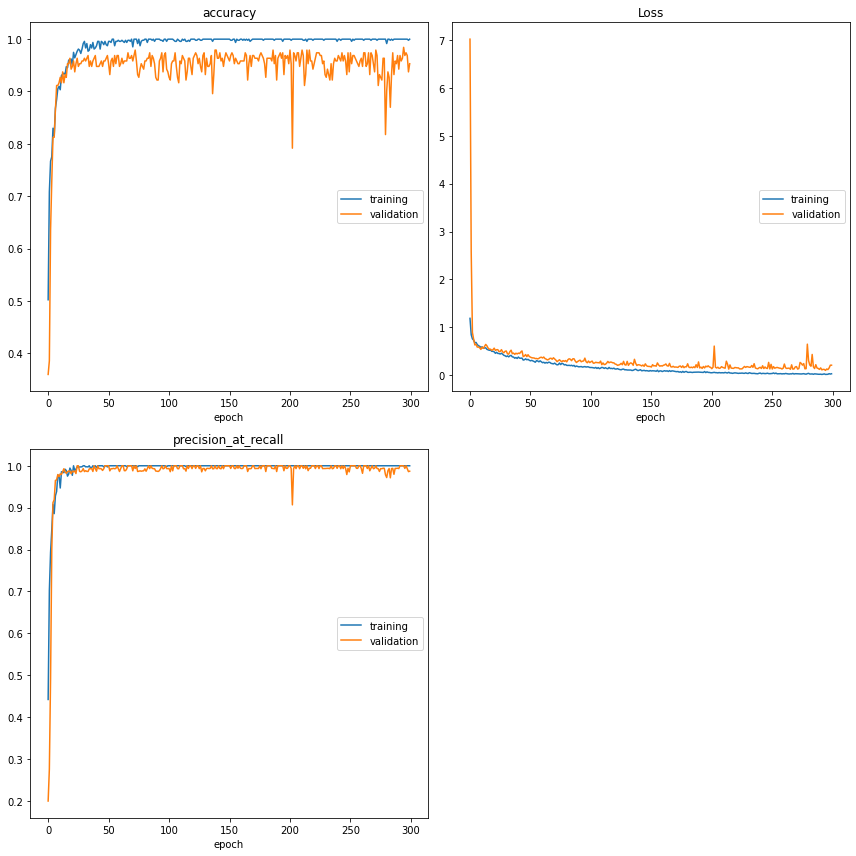

accuracy
	training         	 (min:    0.502, max:    1.000, cur:    1.000)
	validation       	 (min:    0.359, max:    0.984, cur:    0.953)
Loss
	training         	 (min:    0.017, max:    1.188, cur:    0.031)
	validation       	 (min:    0.101, max:    7.015, cur:    0.210)
precision_at_recall
	training         	 (min:    0.442, max:    1.000, cur:    1.000)
	validation       	 (min:    0.200, max:    1.000, cur:    0.987)

Epoch 00300: saving model to model_weights.h5


In [7]:
epochs = 300
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.0001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

In [8]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [9]:
class tagDetectionModel(object):

    EMOTIONS_LIST = ["button","image","input","paragraph","title"]


    def __init__(self, model_json_file, model_weights_file):
        # load model from JSON file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)

        # load weights into the new model
        self.loaded_model.load_weights(model_weights_file)
        #self.loaded_model.compile()
        #self.loaded_model._make_predict_function()

    def predict(self, img):
        global session
        set_session(session)
        self.preds = self.loaded_model.predict(img)
        return tagDetectionModel.EMOTIONS_LIST[np.argmax(self.preds)]


labelNames = ["button","title","input","paragraph","image"]

model = tagDetectionModel("model.json", "model_weights.h5")

In [10]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.15
session = tf.compat.v1.Session(config=config)
set_session(session)


dirs=os.listdir("/kaggle/input/dataset3/dataset/test/")
accuracy={}
print(dirs)
outs=[]
for i in dirs:
    ims=os.listdir("/kaggle/input/dataset3/dataset/test/"+i)
    count=0
    
    for j in ims:
        image = cv2.imread("/kaggle/input/dataset3/dataset/test/"+i+"/"+j)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image=cv2.resize(gray, (75, 75))
        pred=model.predict(image[np.newaxis, :, :, np.newaxis])
        outs.append((pred,i))
        if pred==i:
            count+=1
    print(i,"done",end="\t")
    accuracy[i]=(count/len(ims))*100

print("\n\n")
for i in accuracy:
    print(i,":",accuracy[i],)

2022-10-31 16:28:14.545026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 16:28:14.546368: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 16:28:14.547205: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 16:28:14.548144: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 16:28:14.548962: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

['button', 'title', 'input', 'paragraph', 'image']
button done	title done	input done	paragraph done	image done	


button : 95.0
title : 98.66666666666667
input : 100.0
paragraph : 73.33333333333333
image : 100.0


In [11]:
for i in outs:
    print(i)

('button', 'button')
('button', 'button')
('button', 'button')
('button', 'button')
('button', 'button')
('input', 'button')
('button', 'button')
('button', 'button')
('button', 'button')
('button', 'button')
('button', 'button')
('button', 'button')
('button', 'button')
('button', 'button')
('button', 'button')
('button', 'button')
('button', 'button')
('button', 'button')
('button', 'button')
('button', 'button')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', 'title')
('title', '

In [12]:
len(outs)

197